In [3]:
#시계열 : 시간에 따른 데이터분석
from datetime import datetime
now1 = datetime.now()
print(now1)
now2 = datetime.today()
print(now2)

2023-12-29 09:22:33.633360
2023-12-29 09:22:33.633361


In [12]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,10,12,30,56)
print(t1)
print(t2)
print(t3)

diff1 = t1 - t2 #일로 출력 :현재날짜 - 과거날짜
print(diff1)
print(type(t1))
print(type(t2))
print(type(diff1))

diff2 = t2 - t1 #과거날짜 - 현재날짜
print(type(diff2))

2023-12-29 09:29:31.073404
1970-01-01 00:00:00
1970-12-10 12:30:56
19720 days, 9:29:31.073404
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.timedelta'>


In [22]:
import pandas as pd
ebola = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/country_timeseries.csv')

#ebola.info()

ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola['date_dt']
ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%Y/%M/%d')
ebola['date_dt']

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
         ...    
117   2014-03-27
118   2014-03-26
119   2014-03-25
120   2014-03-24
121   2014-03-22
Name: date_dt, Length: 122, dtype: datetime64[ns]

In [32]:
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
#test_df1.info()
test_df1

,order_day,date_dt1,date_dt2,date_dt3
0,01/01/15,2015-01-01,2015-01-01,2015-01-01
1,02/01/15,2015-02-01,2015-02-01,2015-02-01
2,03/01/15,2015-03-01,2015-03-01,2015-03-01


In [38]:
now = datetime.now()
now
nowDate = now.strftime('%Y-%m-%d') #갖고오고싶은 스트링타입 : 날짜를 문자로 형변환
nowDate
nowTime = now.strftime('%H:%M:%S')
nowTime
nowDateTime = now.strftime('%Y-%m-%d %H:%M:%S')
nowDateTime

'2023-12-29 10:04:33'

In [51]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
date_series
d1 = pd.to_datetime(date_series)
#date_series.info()
#d1.info()

d1[0].year
d1[0].month
d1[0].day

16

In [66]:
ebola
ebola.columns
ebola[['Date','date_dt']].head()
ebola['date_dt'][0].year
ebola['date_dt'][0].month
ebola['date_dt'][0].day

ebola['date_dt'].dt.year
ebola['date_dt'].dt.month
ebola['date_dt'].dt.day

ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date','date_dt','year']].head
ebola['month'], ebola['day'] = ebola['date_dt'].dt.month, ebola['date_dt'].dt.day
ebola[['Date','date_dt','year','month', 'day']].head

<bound method NDFrame.head of            Date    date_dt  year  month  day
0      1/5/2015 2015-01-05  2015      1    5
1      1/4/2015 2015-01-04  2015      1    4
2      1/3/2015 2015-01-03  2015      1    3
3      1/2/2015 2015-01-02  2015      1    2
4    12/31/2014 2014-12-31  2014     12   31
..          ...        ...   ...    ...  ...
117   3/27/2014 2014-03-27  2014      3   27
118   3/26/2014 2014-03-26  2014      3   26
119   3/25/2014 2014-03-25  2014      3   25
120   3/24/2014 2014-03-24  2014      3   24
121   3/22/2014 2014-03-22  2014      3   22

[122 rows x 5 columns]>

In [76]:
#에볼라 최초 발병일 계산하기
ebola.columns
#ebola['Date'].min()
ebola['date_dt'].min()
type(ebola['date_dt'].min()) # Tiemstamp : 1970-01-01 00:00:00.00000 : 0
                             #           : 1970-01-01 00:00:00.00001 : 1
                             # 641641469141

#ebola 유행기간
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date','Day','outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


In [117]:
import pandas as pd

# CSV 파일을 읽기
banks = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/banklist.csv')

banks['Closing Date'] = pd.to_datetime(banks['Closing Date'], format='%d-%b-%y %d-%b-%y', errors='coerce')
banks['closing_quarter'] = banks['Closing Date'].dt.quarter
banks['closing_year'] = banks['Closing Date'].dt.year

# 필요한 열만 선택하여 출력
result_df = banks[['Closing Date', 'closing_quarter', 'closing_year']].head()
print(result_df)

error: redefinition of group name 'd' as group 4; was group 1 at position 115

In [115]:
banks = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/banklist.csv', 
                    parse_dates=[[5, 6]], dayfirst=True, infer_datetime_format=True)

# 'Closing Date_Updated Date' 열을 datetime 형식으로 변환
banks['Closing Date_Updated Date'] = pd.to_datetime(banks['Closing Date_Updated Date'], dayfirst=True, errors='coerce')

# 새로운 열 생성
banks['closing_quarter'] = banks['Closing Date_Updated Date'].dt.quarter
banks['closing_year'] = banks['Closing Date_Updated Date'].dt.year

# 필요한 열만 선택하여 출력
result_df = banks[['Closing Date_Updated Date', 'closing_quarter', 'closing_year']].head()
print(result_df)

  Closing Date_Updated Date  closing_quarter  closing_year
0                       NaT              NaN           NaN
1                       NaT              NaN           NaN
2                       NaT              NaN           NaN
3                       NaT              NaN           NaN
4                       NaT              NaN           NaN


C:\Users\sdedu\AppData\Local\Temp\ipykernel_12684\3830782382.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banks = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/banklist.csv',
C:\Users\sdedu\AppData\Local\Temp\ipykernel_12684\3830782382.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/banklist.csv',
C:\Users\sdedu\AppData\Local\Temp\ipykernel_12684\3830782382.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consi

In [119]:
#각년도별 파산은행갯수
banks.groupby('closing_year').size()
#각 년도별 분기에 따른 파산 은행 개수
banks.groupby(['closing_year', 'closing_quarter']).size()

KeyError: 'closing_year'

KeyError: 'closing_year'

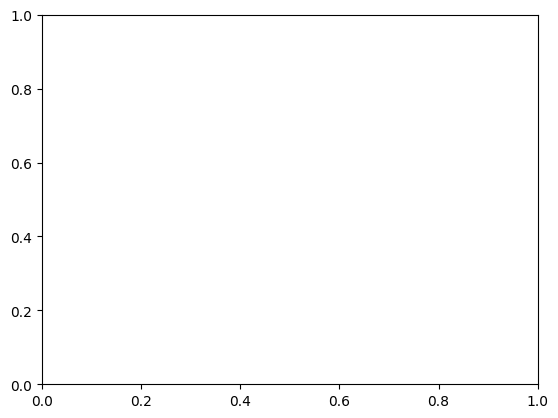

In [127]:
#!pip install matplotlib

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = banks['closing_year'].plot()
#plt.show()
banks.groupby('closing_year').size().plot()
plt.show()

In [157]:
#테슬라 주식데이터로 시간 계산하기 : 시계열
#!pip install pandas_datareader
# https://www.quandl.com : API 다운로드
'''
pd.core.common.is_list_like = pd.api.types.is_list_like
tesla = pdr.get_data_quandl('TSLA',api_key = '')
'''
tesla = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/tesla_stock_quandl.csv', parse_dates=[0])
#tesla.info()

#2010년도 6월의 주식을 출력
tesla['Date'].dt.year == 2010
tesla.Date.dt.month == 6
tesla[(tesla['Date'].dt.year == 2010) & (tesla.Date.dt.month == 6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


In [160]:
tesla.shape
tesla.columns
tesla.index
tesla['Date']
tesla.index = tesla['Date'] 
tesla.index
tesla.iloc[:5, 0:5]
tesla.loc['2018'].iloc[:5,:5]

#2018년도 3월 데이터를 5행, 5열만 출력
tesla.loc['2018-03'].iloc[:5,:5]

,Date,Open,High,Low,Close
Date,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53


In [168]:
#시간간격을 인덱스로 설정하여 데이터 추출
#tesla.cloumns
tesla['Date'] - tesla['Date'].min()
tesla.index = tesla['Date'] - tesla['Date'].min()
tesla.index 

#8일째 되는날의 데이터 출력
tesla.loc['8 days']

Date          2010-07-07 00:00:00
Open                         16.4
High                        16.63
Low                         14.98
Close                        15.8
Volume                  6921700.0
ExDividend                    0.0
SplitRatio                    1.0
AdjOpen                      16.4
AdjHigh                     16.63
AdjLow                      14.98
AdjClose                     15.8
AdjVolume               6921700.0
Name: 8 days 00:00:00, dtype: object

In [180]:
ebola = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/country_timeseries.csv', parse_dates=[0])
#ebola.info()

range_num = range(0, 10) #숫자

#날짜를 범위로 가져오기
head_range = pd.date_range('2014-12-31', '2015-01-04')
head_range # 5개의 index
ebola_5 = ebola.head()
ebola_5
ebola_5['Date']
ebola_5.index = ebola_5['Date']
ebola_5.index
#시간 index로 변경
ebola_5.reindex(head_range)
ebola_5.index

DatetimeIndex(['2015-01-05', '2015-01-04', '2015-01-03', '2015-01-02',
               '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [182]:
head_range = pd.date_range('2014-12-31', '2015-01-04')
head_range # 5개의 index
ebola_5 = ebola.head()
ebola_5
ebola_5.index = head_range #크기가 같으면 숫자 index를 날짜 index로 변환가능
ebola_5.index

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04'],
              dtype='datetime64[ns]', freq='D')

In [187]:
head_range = pd.date_range('2015-01-04','2014-12-31')
head_range # 5개의 index
ebola_5 = ebola.head()
ebola_5
#ebola_5.index = head_range #크기가 같으면 숫자 index를 날짜 index로 변환가능
ebola_5.index = ebola_5['Date'] #날짜형태의 index로 변경
ebola_5.index
ebola_5.info()

#시간index로 변경
ebola_5.reindex(head_range) #index의 범위가 달라도 index를 바꿀수 있다
ebola_5.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-01-05 to 2014-12-31
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      int64         
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nigeria    

DatetimeIndex(['2015-01-05', '2015-01-04', '2015-01-03', '2015-01-02',
               '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

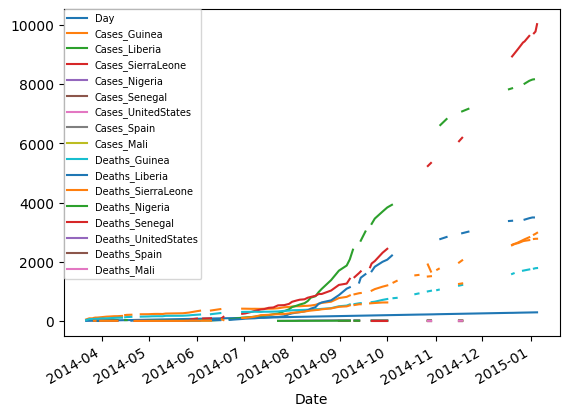

In [193]:
#에볼라의 확산속도를 그래프로 비교하기
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.iloc[:, 1:].plot(ax=ax)
ax.legend(fontsize =7, loc = 2, borderaxespad=0)
plt.show()

In [201]:
ebola = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/country_timeseries.csv', parse_dates=['Date'])
ebola.head().iloc[:, 0:5]
ebola.index = ebola['Date']
ebola

#칼럼지우기
#Date Day
ebola_shift = ebola.drop(['Date','Day'], axis=1)
ebola
ebola_shift
#2015 01 05   2015 01 03
ebola_shift = ebola.drop(['2015-01-05','2015-01-03'], axis=0)
ebola_shift


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2014-12-28,2014-12-28,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
2014-12-27,2014-12-27,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#기존데이터 생성
data = {'A' : [1,2,3], 'B':[4,5,6]}
df = pd.DataFrame(data, )